Setups

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
#signal can used to operate the filtering, convolution and Gaussian Transform

use 1D filter perform a linear filtering

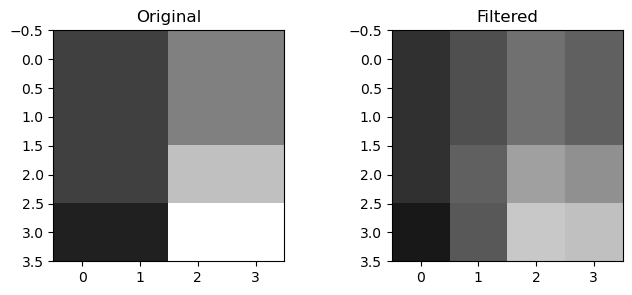

In [5]:
#picture
x = np.array([[10, 10, 20, 20],
             [10, 10, 20, 20],
             [10, 10, 30, 30],
             [5, 5, 40, 40]])
#1D filter
h = 0.25 * np.array([1, 2, 1])

x_filtered = signal.convolve2d(x, h.reshape(1, -1), mode='same')
#h is original a 1d filter, use reshape to convert to 2D filter with size (1,3), so we can do 2d convolution
#(1,-1),first 1 means 1 row, -1 is a placeholder means automatically get the size of cols
#plot
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].imshow(x, cmap='gray', vmin=0, vmax=40)#vmin, vmax are mapping limit, vmin is black, vmax is white
axs[0].set_title('Original')
axs[1].imshow(x_filtered, cmap='gray', vmin=0, vmax=40)
axs[1].set_title('Filtered')
plt.show()

Not using convolution function:
the point is about the border, the image should be padded 0 on both side

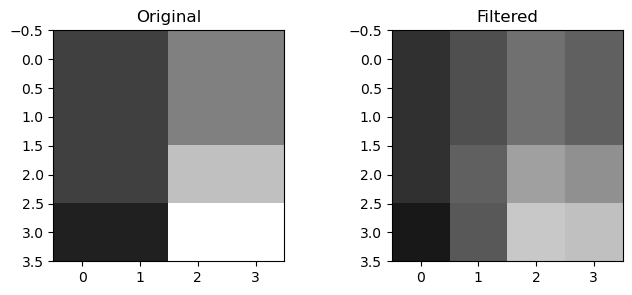

In [9]:
def filter_image_1d(image, filter_response):
    height, width = image.shape
    filter_length = filter_response.shape[0]# 1d array,shape[0] returns the size, not rows
#we set a offset to get the pre- and next pixels
    filter_offset = (filter_length - 1) // 2
#pad the image
    image_padded = np.pad(image, ((0, 0), (filter_offset, filter_offset)))
#initialize a zero array the same size as the image, ready to get the numbers
    image_filtered = np.zeros((height, width))
#not using convolution, we can only do the circulations to multiply filter elements with pixels and add them together
#the filter should also flip before multiply
    for i in range(height):
        for j in range(width):
            for n in range(-filter_offset, filter_offset + 1):
                image_filtered[i,j] = image_filtered[i,j] + image_padded[i,j+filter_offset-n] * filter_response[n+filter_offset]
    return image_filtered

x_filtered = filter_image_1d(x, h)
#plot
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].imshow(x, cmap='gray', vmin=0, vmax=40)
axs[0].set_title('Original')
axs[1].imshow(x_filtered, cmap='gray', vmin=0, vmax=40)
axs[1].set_title('Filtered')
plt.show()

different pad modes:

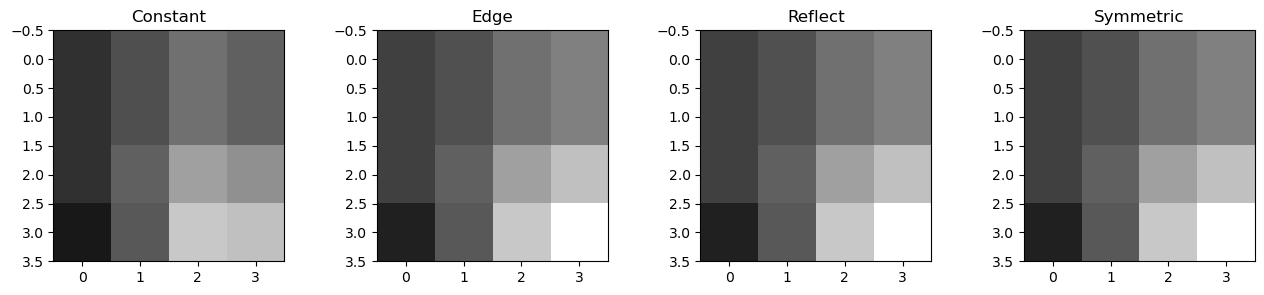

In [10]:
def filter_image_1d(image, filter_response,pad_mode='constant'):
    height, width = image.shape
    filter_length = filter_response.shape[0]
    
    filter_offset = (filter_length - 1) // 2
    
    image_padded = np.pad(image, ((0, 0), (filter_offset, filter_offset)), mode=pad_mode)
    
    image_filtered = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            for n in range(-filter_offset, filter_offset + 1):
                image_filtered[i, j] = image_filtered[i, j] + image_padded[i, j + filter_offset - n] * filter_response[n + filter_offset]
    return image_filtered

modes = ['constant', 'edge', 'reflect', 'symmetric']
#plot
fig, axs = plt.subplots(1, len(modes), figsize=(len(modes) * 4, 3))
for i, mode in enumerate(modes):
    image_filtered = filter_image_1d(x, h, pad_mode = mode)
    axs[i].imshow(image_filtered, cmap='gray', vmin=0, vmax=40)
    axs[i].set_title(mode.capitalize())
plt.show()